In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
import scipy.stats as stats
import scipy as sp 

from TaxonomyNodeClass import TaxonomyNode

In [2]:
np.random.seed(42)

In [3]:
root = TaxonomyNode("root")

In [4]:
means_C_0 = stats.norm.rvs(loc=0,scale=10,size=8)
means_C_1 = stats.norm.rvs(loc=0,scale=20,size=8)
sd_C_0 = stats.gamma.rvs(a=2,scale=1,size=8)
sd_C_1 = stats.gamma.rvs(a=10,scale=1,size=8)
means_C = stats.beta.rvs( a=2,b=10,size=8)

In [5]:
sign= np.sign(means_C_1)
direction = ["greaterthan" if d > 0 else "lessthan" for d in sign]
eta = sign*(sd_C_1*3+ np.abs(means_C_1))

In [6]:
# Create level 1 nodes
node_a = TaxonomyNode("Node A", parent=root)
node_b = TaxonomyNode("Node B", parent=root)
# Create level 2 nodes
node_a1 = TaxonomyNode("Node A1", parent=node_a)
node_a2 = TaxonomyNode("Node A2", parent=node_a)
node_b1 = TaxonomyNode("Node B1", parent=node_b)    
node_b2 = TaxonomyNode("Node B2", parent=node_b)
# Create level 3 nodes
node_a1a = TaxonomyNode("Node A1a", parent=node_a1, distribution_D_C = [stats.norm(loc=means_C_0[0], scale=sd_C_0[0]), stats.norm(loc=means_C_1[0], scale=sd_C_1[0])], distribution_C = stats.bernoulli(p=means_C[0]),eta=eta[0], direction = direction[0])
node_a1b = TaxonomyNode("Node A1b", parent=node_a1, distribution_D_C = [stats.norm(loc=means_C_1[1], scale=sd_C_0[1]), stats.norm(loc=means_C_1[1], scale=sd_C_1[1])], distribution_C = stats.bernoulli(p=means_C[0]),eta =eta[1], direction = direction[1])
node_a2a = TaxonomyNode("Node A2a", parent=node_a2, distribution_D_C = [stats.norm(loc=means_C_0[2], scale=sd_C_0[2]), stats.norm(loc=means_C_1[2], scale=sd_C_1[2])], distribution_C = stats.bernoulli(p=means_C[0]),eta =eta[2], direction = direction[2])
node_a2b = TaxonomyNode("Node A2b", parent=node_a2, distribution_D_C = [stats.norm(loc=means_C_0[3], scale=sd_C_0[3]), stats.norm(loc=means_C_1[3], scale=sd_C_1[3])], distribution_C = stats.bernoulli(p=means_C[0]),eta =eta[3], direction = direction[3])
node_b1a = TaxonomyNode("Node B1a", parent=node_b1, distribution_D_C = [stats.norm(loc=means_C_0[4], scale=sd_C_0[4]), stats.norm(loc=means_C_1[4], scale=sd_C_1[4])], distribution_C = stats.bernoulli(p=means_C[0]),eta =eta[4], direction = direction[4])
node_b1b = TaxonomyNode("Node B1b", parent=node_b1, distribution_D_C = [stats.norm(loc=means_C_0[5], scale=sd_C_0[5]), stats.norm(loc=means_C_1[5], scale=sd_C_1[5])], distribution_C = stats.bernoulli(p=means_C[0]),eta =eta[5], direction = direction[5])
node_b2a = TaxonomyNode("Node B2a", parent=node_b2, distribution_D_C = [stats.norm(loc=means_C_0[6], scale=sd_C_0[6]), stats.norm(loc=means_C_1[6], scale=sd_C_1[6])], distribution_C = stats.bernoulli(p=means_C[0]),eta =eta[6], direction = direction[6])
node_b2b = TaxonomyNode("Node B2b", parent=node_b2, distribution_D_C = [stats.norm(loc=means_C_0[7], scale=sd_C_0[7]), stats.norm(loc=means_C_1[7], scale=sd_C_1[7])], distribution_C = stats.bernoulli(p=means_C[0]),eta =eta[7], direction = direction[7])

In [7]:
node_b1b.prec_recall_calc()

In [8]:
node_b1b.probability_matrix

array([[8.51998282e-001, 1.47801931e-001],
       [3.21938013e-297, 1.99787228e-004]])

In [9]:
[child.set_distribution_C() for child in node_a.children]
[child.set_distribution_C() for child in node_b.children]
[child.set_distribution_D_C() for child in node_a.children]
[child.set_distribution_D_C() for child in node_b.children]
[child.set_distribution_C() for child in root.children]
[child.set_distribution_D_C() for child in root.children]

[None, None]

In [10]:
root.set_distribution_C()
root.set_distribution_D_C()

In [11]:
node_a.eta = 10
node_b.eta = 6
node_a.prec_recall_calc(direction="greaterthan")
node_b.prec_recall_calc(direction="greaterthan")


In [12]:
print("node_a precision: {}, node_a recall: {}".format(node_a.precision, node_a.recall))
print("node_b precision: {}, node_b recall: {}".format(node_b.precision, node_b.recall))

node_a precision: 0.05812753646498386, node_a recall: 0.06874188603927033
node_b precision: 8.174646540391886e-06, node_b recall: 9.10549981753144e-06


In [17]:
root.eta = 10

In [18]:
root.prec_recall_calc(direction='lessthan')
print("Root precision: {}, Root recall: {}".format(root.precision, root.recall))

Root precision: 0.9999999999999999, Root recall: 0.9999589861176733


In [37]:
eta_test = np.linspace(-100,500,10000)
precision_test = np.zeros(eta_test.shape)
recall_test = np.zeros(eta_test.shape)

In [38]:
for i, eta in enumerate(eta_test):
    node_a1a.eta = eta
    node_a1a.prec_recall_calc(direction="greaterthan")
    precision_test[i] = root.precision
    recall_test[i] = root.recall

Suppose we conditiong node_a on root firing. Then $D_{root}=1$

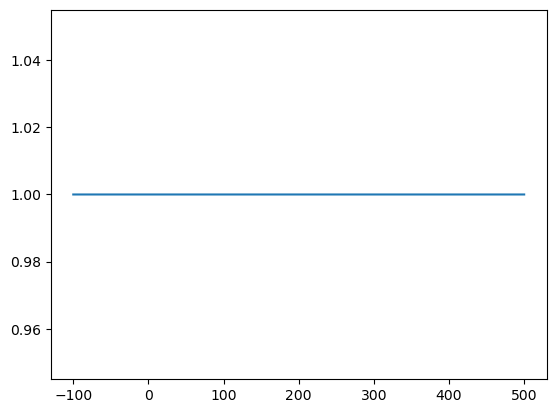

In [39]:
plt.figure()
plt.plot(eta_test, precision_test, label="Precision")
plt.xlim=(-100,500)
plt.ylim=(0,1)